# Classical game of life: Simulations

## Imports and some definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
%matplotlib notebook

#definitions of the possible states for the lattice
ALIVE=1
DEAD=0
states=[ALIVE,DEAD]

#lattice size
L = 50  

# populate grid with more DEAD cells than ALIVE cells, but randomly
grid = np.random.choice(states, L*L, p=[0.1,0.9]).reshape(L, L)

#-------------------------some visualisation stuff and functions------------------------------

#define color map for the plot
cmap = mpl.colors.ListedColormap(['black','white'])
bounds = [-1,0.5,1.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


## Define the rules of the "game"

Here we define a function to update the lattice with the rules of the classical game of life presented before:

In [12]:
def update(data):
    #print("update")
    global grid
    newGrid = grid.copy()
    for i in range(L):
        for j in range(L):
            total = (grid[i, (j-1)%L] + grid[i, (j+1)%L] + grid[(i-1)%L, j] + grid[(i+1)%L, j] + grid[(i-1)%L, (j-1)%L] + grid[(i-1)%L, (j+1)%L] + grid[(i+1)%L, (j-1)%L] + grid[(i+1)%L, (j+1)%L])
            if grid[i, j]  == ALIVE:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = DEAD
            else:
                if total == 3:
                    newGrid[i, j] = ALIVE
    mat.set_data(newGrid)
    grid = newGrid
    return [mat]

#-------------------------other function for mean liveness------------------------------
def update_only_grid(grid):
    #print("update")
    newGrid = grid.copy()
    for i in range(L):
        for j in range(L):
            total = (grid[i, (j-1)%L] + grid[i, (j+1)%L] + grid[(i-1)%L, j] + grid[(i+1)%L, j] + grid[(i-1)%L, (j-1)%L] + grid[(i-1)%L, (j+1)%L] + grid[(i+1)%L, (j-1)%L] + grid[(i+1)%L, (j+1)%L])
            if grid[i, j]  == ALIVE:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = DEAD
            else:
                if total == 3:
                    newGrid[i, j] = ALIVE
    mat.set_data(newGrid)
    grid = newGrid
    return grid

## Random configuration

First, let's generate a random lattice of size LxL (L=50) and simulate the game of life for infinite generations

In [13]:
#lattice size
L = 50  

# populate grid with more DEAD cells than ALIVE cells, but randomly
grid = np.random.choice(states, L*L, p=[0.2,0.8]).reshape(L, L)

#simulate the classical game of life from this random lattice
fig, ax = plt.subplots()
mat = ax.matshow(grid,cmap=cmap, norm=norm)
ani = animation.FuncAnimation(fig, update, interval=50,save_count=50)
fig.show()



<IPython.core.display.Javascript object>

## Mean liveness

The idea here is to compare the mean liveness, defined as $a=\frac{1}{L^2}\sum_i^L^2C_i$ of three differents lattices with different initial probability distribution after 100 generations. 

In [ ]:
#lattice size
L = 100

# populate grid with more DEAD cells than ALIVE cells, but randomly
grid1 = np.random.choice(states, L*L, p=[0.3,0.7]).reshape(L, L)
grid2 = np.random.choice(states, L*L, p=[0.2,0.8]).reshape(L, L)
grid3 = np.random.choice(states, L*L, p=[0.1,0.9]).reshape(L, L)

totalgrid=[grid1,grid2,grid3]

#liveness variables
a1=[]
a2=[]
a3=[]

totala=[a1,a2,a3]

for i in range(300):
    for j in range(3):
        totala[j].append(totalgrid[j].mean())
        totalgrid[j]=update_only_grid(totalgrid[j])

for k in range(3):
    plt.plot(np.arange(0,300,1),totala[k],label=("grid "+str(k+1)))

plt.title("Mean Liveness <a>")
plt.xlabel("Generation")
plt.ylabel("Mean Liveness")
plt.legend()
plt.show()

## Some interesting patterns

### Stable patterns

----------------Boat----------------------

<IPython.core.display.Javascript object>


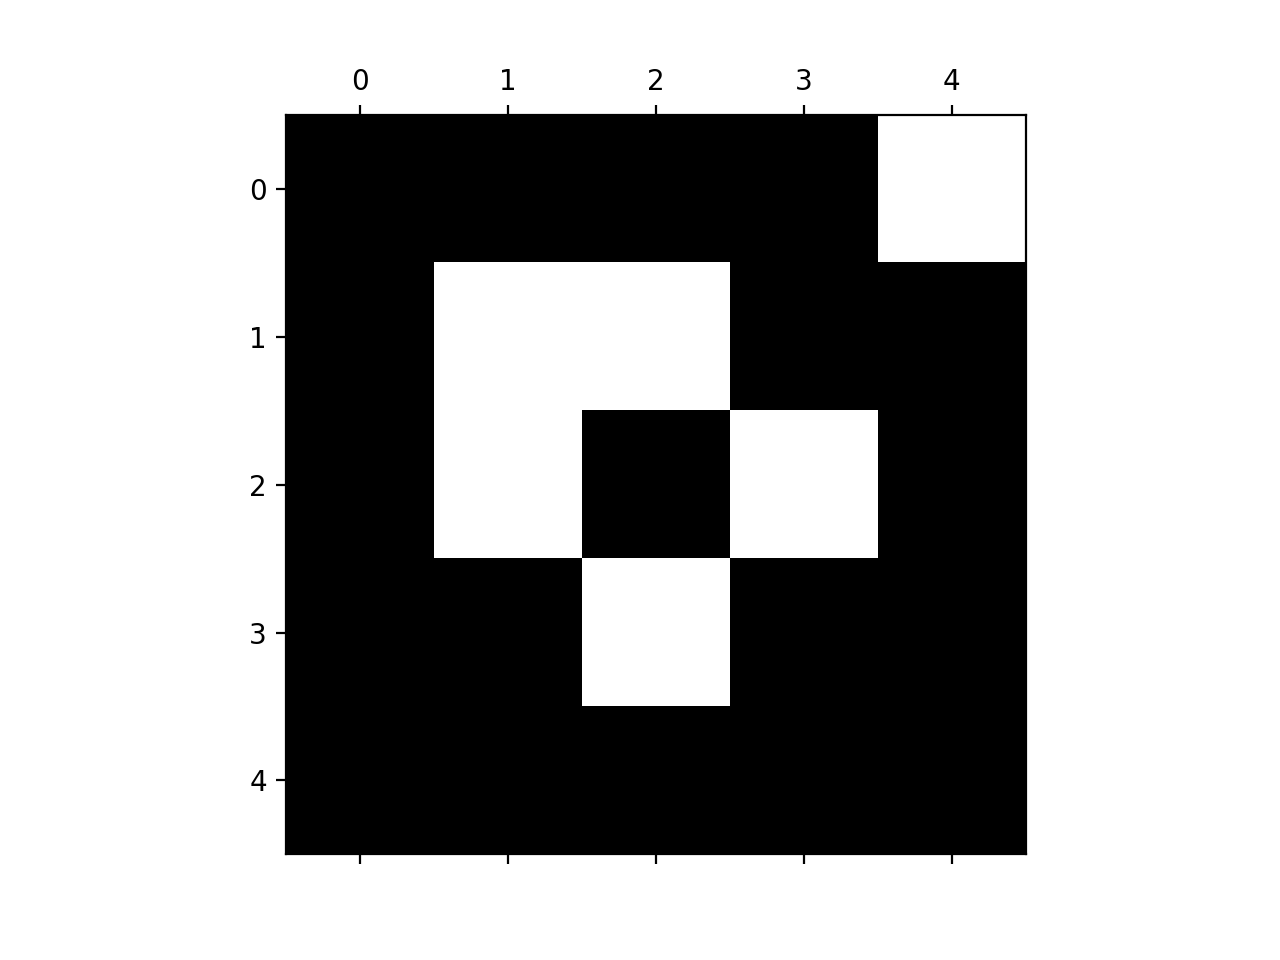

In [18]:
# populate the grid with the "boat" patter
grid = [[0,0,0,0,1],
        [0,1,1,0,0],
        [0,1,0,1,0],
        [0,0,1,0,0],
        [0,0,0,0,0]]

#simulate the classical game of life from this random lattice
fig2, ax2 = plt.subplots()
mat = ax2.matshow(grid,cmap=cmap, norm=norm)
ani2 = animation.FuncAnimation(fig2, update, interval=50,save_count=50)
fig2.show()



----------------Tub---------------------

In [ ]:
# populate the grid with the "boat" patter
grid = [[0,0,0,0,0],
        [0,0,1,0,0],
        [0,1,0,1,0],
        [0,0,1,0,0],
        [0,0,0,0,0]]

#simulate the classical game of life from this random lattice
fig, ax = plt.subplots()
mat = ax.matshow(grid,cmap=cmap, norm=norm)
ani = animation.FuncAnimation(fig, update, interval=50,save_count=50)
plt.show()

### Oscillators

--------------Beacon of period 2-------------------

<IPython.core.display.Javascript object>


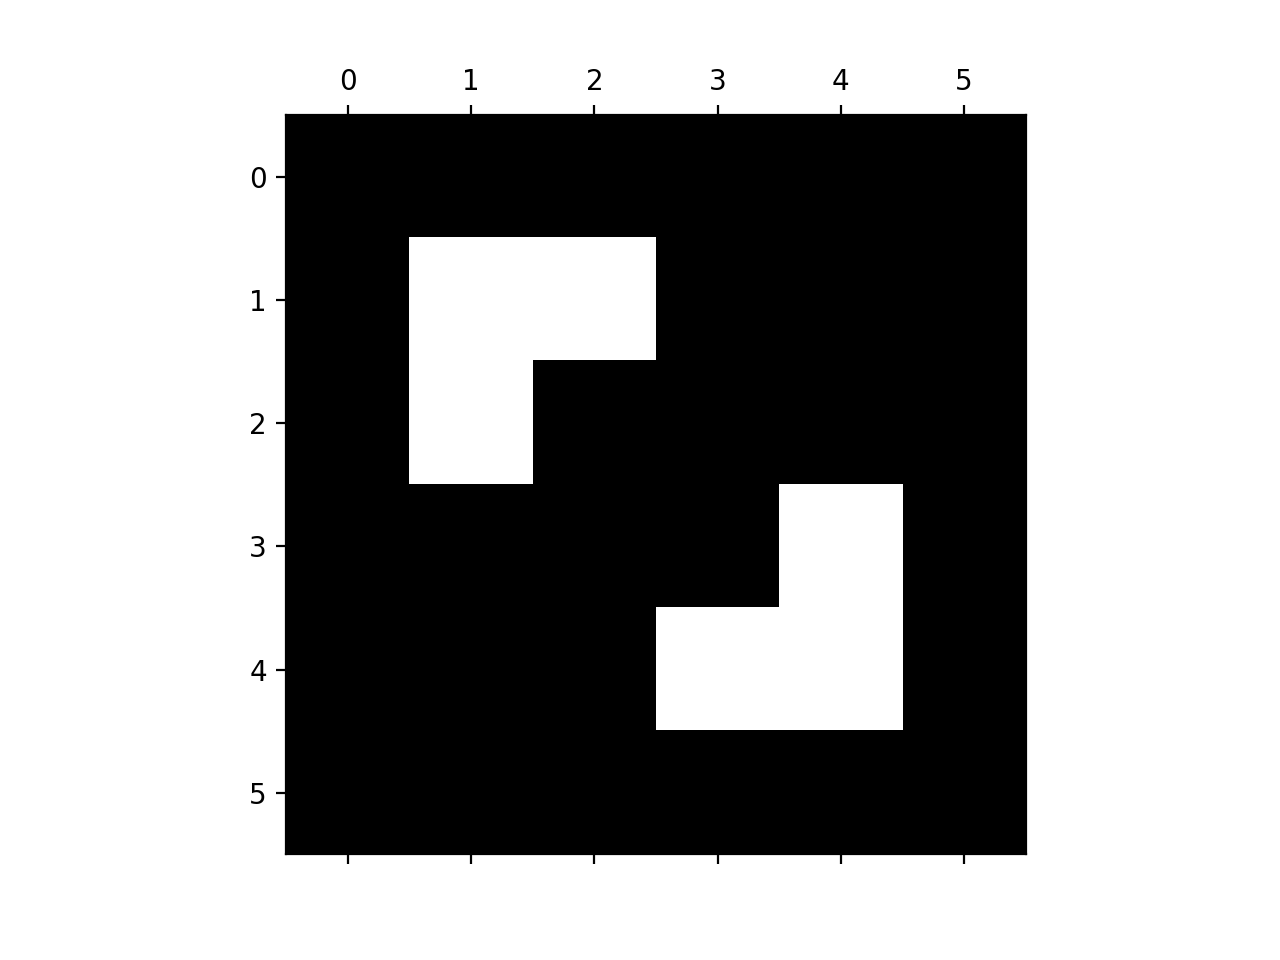

In [4]:
# populate the grid with the "beacon" pattern
grid = [[0,0,0,0,0,0],
        [0,1,1,0,0,0],
        [0,1,0,0,0,0],
        [0,0,0,0,1,0],
        [0,0,0,1,1,0],
        [0,0,0,0,0,0]]

#simulate the classical game of life from this random lattice
fig, ax = plt.subplots()
mat = ax.matshow(grid,cmap=cmap, norm=norm)
ani = animation.FuncAnimation(fig, update, interval=50,save_count=50)
plt.show()